#### Edoardo Bettazzi

Address: 42639338

p-value threshold: 0.05

Normalization: preprocessQuantile

Statistical test: t-test

Please, notice: the version of R currently running on Jupyter notebook is version 3.6. This version, as the associated packages, are out of date with R currently at version 4.2.
Regarding the following analysis, this makes no difference, but it is relevant to know. In case a desired package is not available, it is necessary to use a different environment, as RStudio.

#### Installing packages, brief description

The BiocManager package to install and manage packages from the Bioconductor project for the statistical analysis and comprehension of high-throughput genomic data. To know more about installing and managing Bioconductor packages, visit
https://cran.r-project.org/web/packages/BiocManager/vignettes/BiocManager.html

The minfi package provides tools for analyzing Illumina’s Methylation arrays, specifically 450K and EPIC. It addresses tasks as preprocessing, QC assessments, identification of interesting methylation loci and plotting functionality.
The package takes in input IDAT files, that are representing two different color channels prior to normalization. 
For a user-friendly guide, either run the command browseVignettes("minfi") or directly visit https://bioconductor.org/packages/devel/bioc/vignettes/minfi/inst/doc/minfi.html.

The Illumina 450K Manifest file presents the annotation for the 450K methylation array in the form of a csv file. A description of the columns headings can be found at https://support.illumina.com/bulletins/2016/05/infinium-methylationk-manifest-column-headings.html

shinyMethyl is a Bioconductor package for interactive quality control of DNA methylation data from Illumina 450k arrays. The package summarizes 450k experiments into exportable R objects from which an interactive interface is launched. It presents reactive plots for fast and intuitive quality control assessment of the samples. Moreover, exploration of the phenotypic associations is possible through coloring and principal component analysis.
For accessing the documentation, run the command browseVignettes("shinyMethyl") or visit https://bioconductor.org/packages/release/bioc/html/shinyMethyl.html

factoextra is a package used to extract and visualize the output of exploratory multivariate data analyses, including Principal Component Analysis (PCA), Correspondence Analysis (CA), Multiple Correspondence Analysis (MCA), Multiple Factor Analysis (MFA), Hierarchical Multiple Factor Analysis (HMFA). 
It contains function for ggplot2-based data visualization, and for the facilitation of clustering analysis.
For accessing the documentation, visit https://rpkgs.datanovia.com/factoextra/index.html

The qqman package includes functions for creating manhattan plots and q-q plots from GWAS results. For accessing the documentation, visit https://cran.r-project.org/web/packages/qqman/vignettes/qqman.html

The gplots package provides various R programming tools for plotting data (reference: https://cran.r-project.org/web/packages/gplots/index.html).

In [ ]:
# BiocManager
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.10")

# minfi
BiocManager::install("minfi")

# Illumina manifest
BiocManager::install("IlluminaHumanMethylation450kmanifest")
BiocManager::install("IlluminaHumanMethylation450kanno.ilmn12.hg19")

# shinyMethyl 
BiocManager::install("shinyMethyl")

# factoextra
install.packages("factoextra")

# qqman
install.packages("qqman")

# gplots
install.packages("gplots")

## Step 1. Loading Raw Data

In the following step, the working space is prepared: working directory and input data directories are set, the minfi package and the Illumina manifest for the 450K DNA methylation microarray are loaded. Finally, from the input data directory, the methylation sample sheet containing the pheno-data is read through the minfi package function "read.metharray.sheet(base)".

The minfi package provides tools for analyzing Illumina’s Methylation arrays, specifically 450K and EPIC. It addresses tasks as preprocessing, QC assessments, identification of interesting methylation loci and plotting functionality.
The package takes in input IDAT files, that are representing two different color channels prior to normalization. 
For a user-friendly guide, either run the command browseVignettes("minfi") or directly visit https://bioconductor.org/packages/devel/bioc/vignettes/minfi/inst/doc/minfi.html.

The Illumina 450K Manifest file presents the annotation for the 450K methylation array in the form of a csv file. A description of the columns headings can be found at https://support.illumina.com/bulletins/2016/05/infinium-methylationk-manifest-column-headings.html

In [ ]:
# Clean workspace
rm(list=ls())

# get current working directory
getwd()

# Set desired working directory
setwd("~/DNA_RNA_Project/working_dir")

# Load minfi package
library(minfi)

# Load Illumina manifest
load("~/DNA_RNA_Project/Illumina450Manifest_clean.RData")

# Set input data directory
baseDir <- ("~/DNA_RNA_Project/input_data_report")

# Reading sheet containing pheno-data
targets <- read.metharray.sheet(baseDir)

The data of the methylation array experiment are read into an RGChannelSet object, stored as the variable RGSet, by the read.metharray.exp() function.

In [ ]:
# Reading methylation array data
RGset <- read.metharray.exp(targets = targets)

# Checking output
RGset

## Step 2. Separately storing Red and Green Fluorescence

A dataframe is created for each of the two channels, Red and Green.

In [ ]:
# Red fluorescence
Red <- data.frame(getRed(RGset))

# Check df
head(Red)

# Green fluorescence
Green <- data.frame(getGreen(RGset))

# Check df
head(Green)

## Step 3. Inspecting fluorescence at the address of interest

Checking the Red and Green fluorescence values at the address 42639338

In [ ]:
# Red fluorescence dataframe inspection at "42639338"
red_address <- Red[rownames(Red)=="42639338",]

# Red fluorescence dataframe inspection at "42639338"
green_address <- Green[rownames(Green)=="42639338",]

# Summary table
filled_table <- as.data.frame(cbind(t(red_address),t(green_address),rep(c("II"),each=8)))
colnames(filled_table) <- c("Red fluor","Green fluor","Type")
filled_table

### Design probe type

The design probe type can be verified by inspecting the Illumina manifest presenting the microarray annotations with the address of interest.

In [ ]:
# Store the address annotation
Addr42639338 <- Illumina450Manifest_clean[Illumina450Manifest_clean$AddressA_ID=="42639338",]

# Check the Infinium design type columns
Addr42639338$Infinium_Design_Type

The specified address refers to the Infinium design of type II; in case of a type I design, information about the color channel can be retrieved checking Addr[value]$Color_Channel.

## Step 4. Converting fluorescence intensity data into methylation signals

The RGChannelSet object is processed into a MethylSet object, that cointains the signals of methylation and unmethylation of the analysed data.

This is performed via the preprocessRaw() function.

In [ ]:
# Create MSet.raw object from the RGset object
MSet.raw <- preprocessRaw(RGset)

# Check output
MSet.raw

## Step 5. Quality control

Methylation signal data needs now to be check for good quality; the following steps are performed:

1.	QCplot inspection
2.	Negative controls intensity check
3.	pValues detection


for each sample, how many probes have a detection p-value higher than the threshold assigned to each student?


### 5.1 QCplot

In a QCplot, the medians from the methylation signal and unmethylation signal distributions are plotted. Data of good quality are found at high values of median for both the distributions (that is right and upper part); at contrary, low values of median indicate a lower quality of data.

The getQC() function creates a DataFrame with two columns: mMed and uMed which are the chipwide medians of the Meth and Unmeth channels. Through plotQC(), a diagnostic QC plot is produced from this dataframe.

In [ ]:
qc <- getQC(MSet.raw)
plotQC(qc)

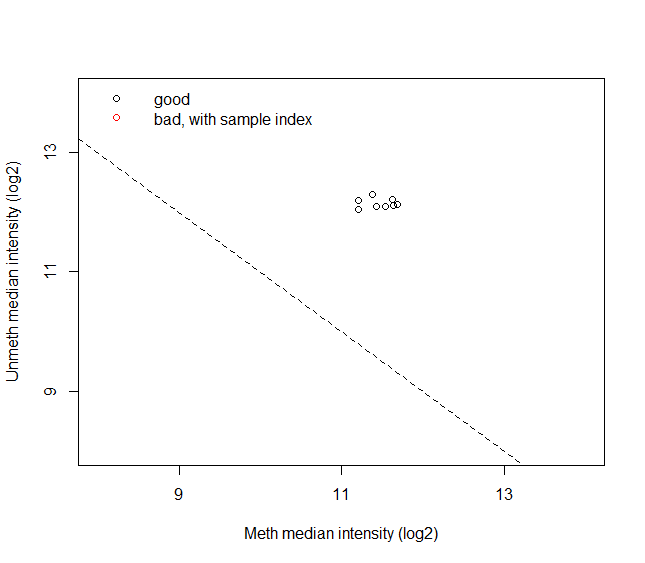
The samples seems to be of good quality, as they appear in the upper region of the plot, thus they have high median values for both the methylation and the unmethylation signals.

### 5.2 Negative control intensity check

The negative controls probes are used to estimate the background intensity of the system.
Under normal experimental condition, the intesity values for these probes can vary from 100 up to 1000 units in a sample-depedent way. 
A dramatic increase of a given sample may indicate poor quality of the DNA template prior to bisulphite conversion.

The check is performed through the function controlStripPlot(), that produces strip plots for the specified control probe type (only negative, in this analysis).

In [ ]:
# Produce strip plots from the negative controls red and green intesities.
controlStripPlot(RGset, controls="NEGATIVE")

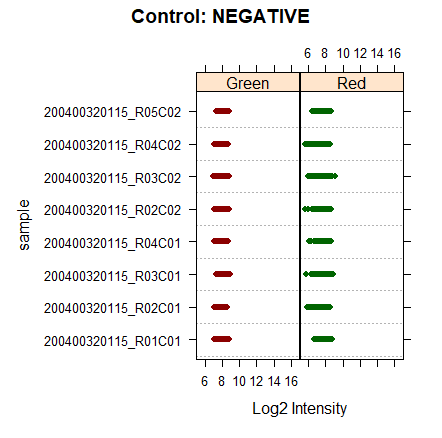
In this case, the background intensity threshold is set at 10 log2 units: any signal lower than this, is considered of low quality.
Regarding the variation of negative controls intensities, it is consistent between the samples, though the Red channel has higher variation and could possibly introduce biases.
Sample-wise, it can be said that quality is good with regard to this step.

### 5.3 Detection of pValues

It indicates the probability that the observed signals are distinguishable from the negative control signals, i.e. the background threshold. It operates under the null hypothesis that observed and background signals are equal. Given that, small p-values allow to reject the null hypothesis and so indicate good positions; positions with non-significant p-values can't be trusted and should be filtered out.

The function detectionP() identifies failed positions defined as both the methylated and unmethylated channel reporting background signal levels. 
A detection p-value is returned for every genomic position in every sample, as a matrix with detection p-values.
The matrix is then filtered according to the chosen p-value (0.05, in the assignment), to report a summary of the low quality positions.


In [ ]:
# Detecting
detP <- detectionP(RGset)

# Filtering
failed <- detP>0.05
summary(failed)

# Summary table
sum <- colSums(failed)
result_matrix <- as.matrix(sapply(sum,as.numeric))
colnames(result_matrix) <- c("failed positions")
result_matrix

## Step 6. Computing raw beta and M values

The beta value, computed as $beta = M/(M+U)$ where M stands for Methylation and U for Unmethylation, represents the level of methylation at a given CpG site. It takes values in the range 0 to 1, where 0 indicates absence of methylation and 1 indicates complete methylation of the position.
The M value, computed as $log2(M/U)$, is a log ratio of the two signals, thus it takes values $<0$ for low to absent methylation, and values $>0$ for increasingly methylated sites.

Comparing the two methods for the differential analysis of methylation levels, it is suggested that the M-value method is statistically more valid (Du et al., 2010), outperforming beta-values in a significant way, but only if the size of the sample is small (Zhuang et al., 2012).
A useful heuristic is to use the M-value method on datasets that comprise up to 5 samples, and include beta values in case of a larger dataset. 

To plot and inspect such values, the dataset of methylation signals is split according to the groups of the experiment (wildtype, WT, and mutated, MUT). For each subset, the beta and M values are extracted using getBeta() and getM(); the mean of the obtained values and its density are computed

In [ ]:
# Store separately data from WT samples and MUT samples
WT <- targets[targets$Group=='WT',"Array"]
MUT <- targets[targets$Group=='MUT',"Array"]

# BETA VALUES
# Compute beta values
beta <- getBeta(MSet.raw)
WT_beta <- beta[, targets$Array %in% WT]
MUT_beta <- beta[, targets$Array %in% MUT]

# Compute beta values mean and density
WT_beta_mean <- apply(WT_beta,1,mean)
MUT_beta_mean <- apply(MUT_beta,1,mean)

WT_beta_d <- density(WT_beta_mean,na.rm=T)
MUT_beta_d <- density(MUT_beta_mean,na.rm=T)

# Plot beta values density
plot(WT_beta_d, col='red',main='Beta values density')
lines(MUT_beta_d,col='blue')
legend('topright', pch=c(15,15), col=c('red','blue'), legend=c('WT','MUT'))

# M VALUES
# Compute M values 
M <- getM(MSet.raw)
WT_M <- M[, targets$Array %in% WT]
MUT_M <- M[, targets$Array %in% MUT]

# Compute M values mean and density 
WT_M_mean <- apply(WT_M,1,mean)
MUT_M_mean <- apply(MUT_M,1,mean)

WT_M_d <- density(WT_M_mean,na.rm=T)
MUT_M_d <- density(MUT_M_mean,na.rm=T)

# Plot M values density
plot(WT_M_d, col='red',main='M values density')
lines(MUT_M_d,col='blue')
legend('topright', pch=c(15,15), col=c('red','blue'), legend=c('WT','MUT'))

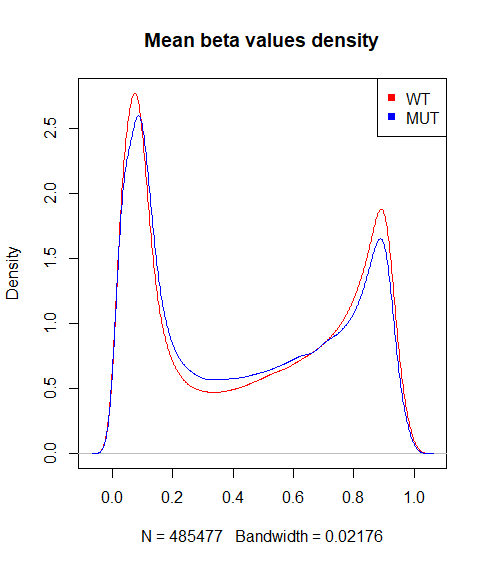

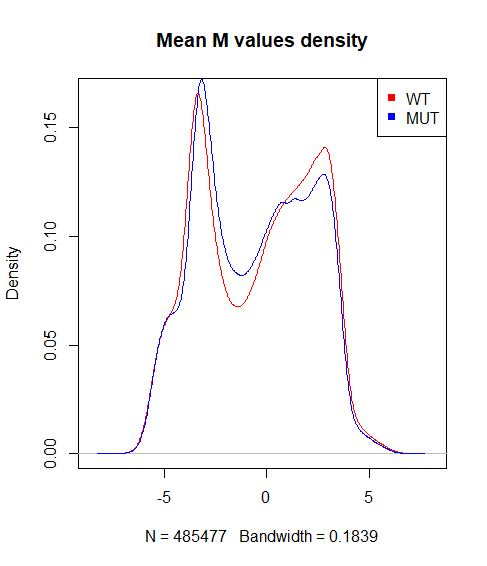

Visually inspecting the plots, we can notice similar distributions between the groups, both in the beta values and in the M values analysis. There are noticeable differences, especially in the M values density plot, that might need further focus.

## Step 7. Normalization

The normalization step, for the removal of technical variations and systematic biases from the results, is performed via preprocessQuantile(), that implements a stratified quantile normalization preprocessing procedure. The probes are stratified by region (CpG island, shore, etc). From the ouput, the normalized beta values can be extracted. The normalized values can then be compared with the raw beta values, to visually assess changes in the datasets.

The procedure can be used to perform a comparison of raw and normalized beta values between Infinium type I and Infinium type II designs.

First, the raw beta values of entire dataset (MSet.raw) are collected, then the normalization procedure is applied to the intensity signals of both Red and Green channels (RGset), from which normalized beta values are extract with the previous getBeta() function.

In [ ]:
# Raw values (already computed in the previous step)
beta

# Normalization
preprocessQuantile_results <- preprocessQuantile(RGset)

# Normalized beta
normalized_beta <- getBeta(preprocessQuantile_results)

The raw beta values from a given Infinium design are extracted from the overall dataset values (variable beta) by cross-reference with the annotation data from the Illumina Manifest.

In [ ]:
# INFINIUM I DESIGN RAW

# Extract Infinium I annotated IDs
InfI <- Illumina450Manifest_clean[Illumina450Manifest_clean$Infinium_Design_Type=="I",]
InfI_IDs <- droplevels(InfI)
# Cross-reference between InfI_IDs and raw beta
beta_I <- beta[rownames(beta) %in% InfI_IDs$IlmnID,]
# Computing mean and standard deviation
beta_I_mean <- apply(beta_I,1, mean)
beta_I_sd <- apply(beta_I, 1, sd)
# Computing densities for plots
beta_I_mean_d <- density(beta_I_mean, na.rm=T)
beta_I_sd_d <- density(beta_I_sd, na.rm=T)

# INFINIUM II DESIGN RAW

# Extract Infinium I annotated IDs
InfII <- Illumina450Manifest_clean[Illumina450Manifest_clean$Infinium_Design_Type=="II",]
InfII_IDs <- droplevels(InfII)
# Cross-reference between InfII_IDs and raw beta
beta_II <- beta[rownames(beta) %in% InfII_IDs$IlmnID,]
# Computing mean and standard deviation
beta_II_mean <- apply(beta_II,1, mean)
beta_II_sd <- apply(beta_II, 1, sd)
# Computing densities for plots
beta_II_mean_d <- density(beta_II_mean, na.rm=T)
beta_II_sd_d <- density(beta_II_sd, na.rm=T)

Similarly, the normalized beta values as well are extracted via cross-reference, involving the overall dataset normalized beta values (variable normalized_beta) and as before, the annotation from the Illumina Manifest. 

In [ ]:
# INFINIUM I DESIGN NORMALIZED

# Cross-reference between InfI_IDs and raw beta
normal_beta_I <- normalized_beta[rownames(normalized_beta) %in% InfI_IDs$IlmnID,]
# Computing mean and standard deviation
normal_beta_I_mean <- apply(normal_beta_I,1, mean)
normal_beta_I_sd <- apply(normal_beta_I, 1, sd)
# Computing densities for plots
normal_beta_I_mean_d <- density(normal_beta_I_mean, na.rm=T)
normal_beta_I_sd_d <- density(normal_beta_I_sd, na.rm=T)

# INFINIUM II DESIGN NORMALIZED

# Cross-reference between InfII_IDs and raw beta
normal_beta_II <- normalized_beta[rownames(normalized_beta) %in% InfII_IDs$IlmnID,]
# Computing mean and standard deviation
normal_beta_II_mean <- apply(normal_beta_II,1, mean)
normal_beta_II_sd <- apply(normal_beta_II, 1, sd)
# Computing densities for plots
normal_beta_II_mean_d <- density(normal_beta_II_mean, na.rm=T)
normal_beta_II_sd_d <- density(normal_beta_II_sd, na.rm=T)

### Visualizing the effect of normalization
For both raw and normalized data, the density plots of the beta mean values and beta standard deviation values according to the chemistry of the probes (InfI and InfII) are produced; moreover a boxplot is realized to better highlight the change in the distributions.

In [ ]:
# Raw beta mean plot
par(mfrow=c(3,2), pin = c(2,2))
plot(beta_I_mean_d, col = "green", main = "Mean Beta (raw)", xlim=c(-0.1,1.1),ylim = c(-0.5,6))
lines(beta_II_mean_d, col = "orange")
legend("topright", legend=c("InfI", "InfII"),
       col=c("green", "orange"), lty=1:1, cex=0.9)
# Normalized beta mean plot
plot(normal_beta_I_mean_d,col="blue",main=" Mean Beta (normalized)", xlim = c(-0.1,1.1), ylim = c(-0.5
  ,6))
lines(normal_beta_II_mean_d,col="red")
legend("topright", legend=c("InfI", "InfII"),
       col=c("blue", "red"), lty=1:1, cex=0.9)
# Raw beta sd plot
plot(beta_I_sd_d, col = "green", main = "St.Dev Beta (raw)", xlim = c(-0.05,0.45), ylim = c(-5,90))
lines(beta_II_sd_d, col = "orange")
legend("topright", legend=c("InfI", "InfII"),
       col=c("green", "orange"), lty=1:1, cex=0.9)
# Normalized beta sd plot
plot(normal_beta_I_sd_d,col="blue",main="St.Dev Beta (normalized)", xlim = c(-0.05,0.45), ylim = c(-5
  ,90))
lines(normal_beta_II_sd_d,col="red")
legend("topright", legend=c("InfI", "InfII"),
       col=c("blue", "red"), lty=1:1, cex=0.9)
# Raw beta boxplot
boxplot(beta,main="Raw beta")
# Normalized beta boxplot
boxplot(normalized_beta, main = "preprocessQuantile normalized beta")

## OPTIONAL:
# WT slide arrays
WT_group <- colnames(WT_beta)
# MUT slide arrays
MUT_group <- colnames(MUT_beta)
# Vector color-mapping beta-values object columns to WT arrays and MUT arrays
colors = c("pink", "cadetblue1", "pink", "pink", "cadetblue1", "cadetblue1", "pink", "cadetblue1")
# Raw data Plot
boxplot(beta, col=colors, main="WT and MUT raw beta values")
legend("topright", inset=c(-0.4,0), legend=c("MUT", "WT"),
       col=c("cadetblue1", "pink"), lty=1:1, cex=0.9, xpd=TRUE)
# Normalized data Plot
boxplot(normalized_beta, col=colors, main="WT and MUT normalized beta values")
legend("topright", inset=c(-0.4,0), legend=c("MUT", "WT"),
       col=c("cadetblue1", "pink"), lty=1:1, cex=0.9, xpd=TRUE)

### Plots

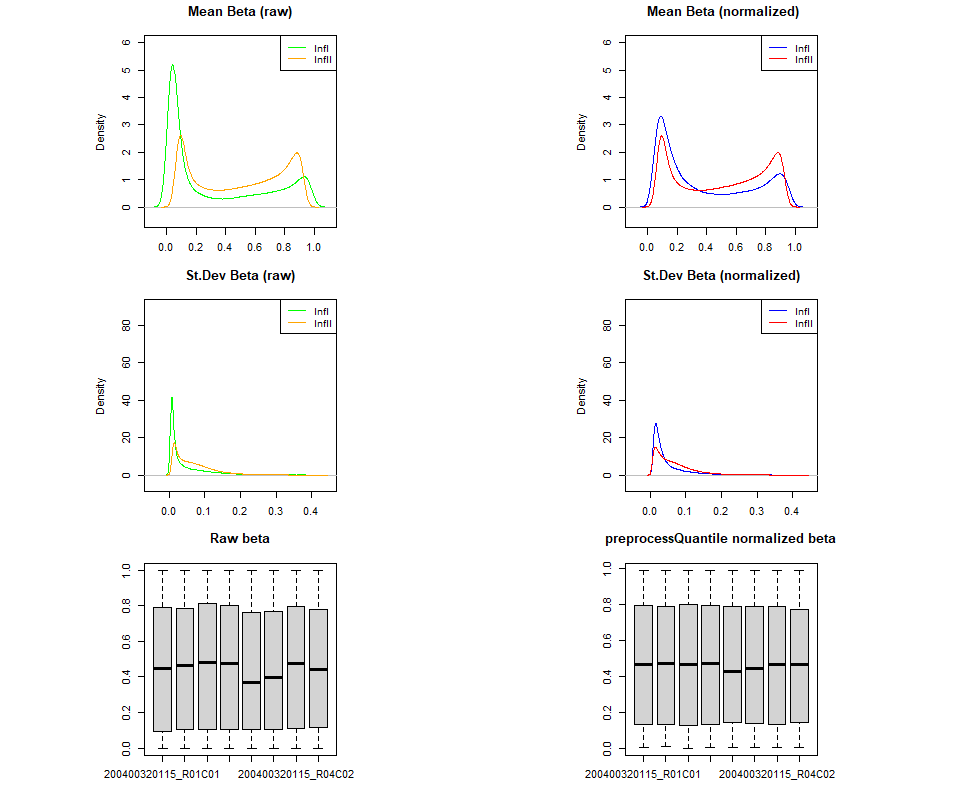

It can be noticed that the normalization procedure has a major effect on Infinium I probes raw data, especially observing the peak at beta values near 0. The cause of this could be traced back to an intrinsic bias of the two probe designs: the Infinium II assay is known less sensitive to extreme methylation values (Dedeurwaeder et al, 2011), thus the density of its beta values is shifted towards the centre of the axis, in contrast to the Infinium I distribution that is more stretched (evident in the raw mean beta values plot).

Is the quantile normalization, performed via preprocessQuantile(), appropriate for the dataset at hand? Quantile normalization is a global-adjustment method, it assumes the same statistical distribution for each sample. As evident from the plots produced at step 6, the two populations under analysis (wildtype and mutated), have approximatly the same distributions. The following boxplots make visually clear the normalization effect in relation to the two conditions.

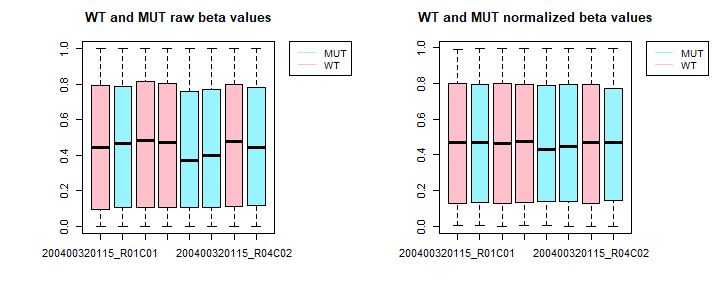

To approach the choice of the appropriate normalization procedure, Bioconductor suggests the following heuristic: 
"If there exist global biological methylation differences between your samples, as for instance a dataset with cancer and normal samples, or a dataset with different tissues/cell types, use the preprocessFunnorm function as it is aimed for such datasets. On the other hand, if you do not expect global differences between your samples, for instance a blood dataset, or one-tissue dataset, use the preprocessQuantile function. In our experience, these two normalization procedures perform always better than the functions preprocessRaw, preprocessIllumina and preprocessSWAN ..." 
by Jean-Philippe Fortin, Kasper Daniel Hansen (http://bioconductor.org/help/course-materials/2015/BioC2015/methylation450k.html)

## Step 8. PCA

The Principal Component Analysis (PCA) is a dimension-reduction technique used to detect low dimensional structures in high dimensional data. 
Briefly, it computes the principal components as estimates of common patterns across the features, thus significantly correlated features get reduced to a single component, and data from the multidimensional space are projected onto the space of principal components, that has fewer dimensions.

The technique can be used to check for large differences in DNA methylation profiles in the analysed sample, due to biological causes or batch effects.
Batch effects are sub-groups of measurements that have qualitatively different behaviour across conditions and are unrelated to the biological or scientific variables in a study. They need to be recognized and eliminated from the analysis, as they have a particularly strong and pervasive impact on results, both on low-dimensional and on high-throughput experiments.
Since normalization doesn't always remove batch effects (Leek et al., 2010), PCA should still be applied on normalized data for diagnostic purposes.

For a reference on how to recognize and treat batch effects, check Leek et al., 2010

In R, the analysis is done by applying the function prcomp() to calculate the PCA of the normalized beta values of the dataset in study. 
The results can be inspected using the function fviz_eig(), that plots the amount of variation, i.e variance, per dimension.
Finally the two components, accounting for most of the variation, are plotted for a batch effect diagnosis.

In [ ]:
# Perform PCA and check results
pca_results <- prcomp(t(normalized_beta),scale=T)
print(summary(pca_results))

# Extract and plot variances from PCA results
library(factoextra)
fviz_eig(pca_results, addlabels = TRUE, barfill = "grey", barcolor = "black")

# Plot components x[,1] and x[,2]
group <- factor(targets$Group)
palette(c("red", "blue"))
plot(pca_results$x[,1], pca_results$x[,2],cex=2,pch=19, col=c(group),xlab="PC1",ylab="PC2", xlim = c(-700, 700), ylim = c(-700, 700))
text(pca_results$x[,1], pca_results$x[,2],labels=rownames(pca_results$x),cex=0.6,pos=2)
legend("topright",legend=c("DS","WT"),col=c("red","blue"),pch=19)

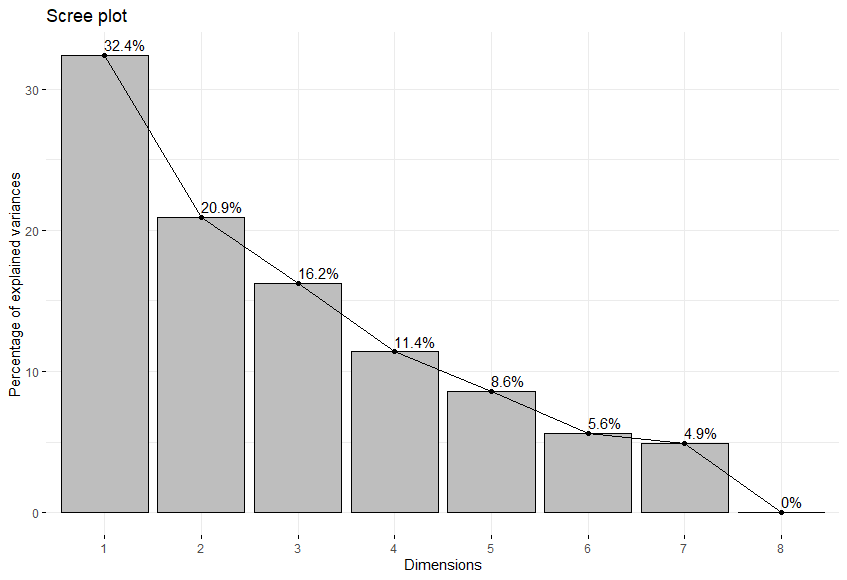

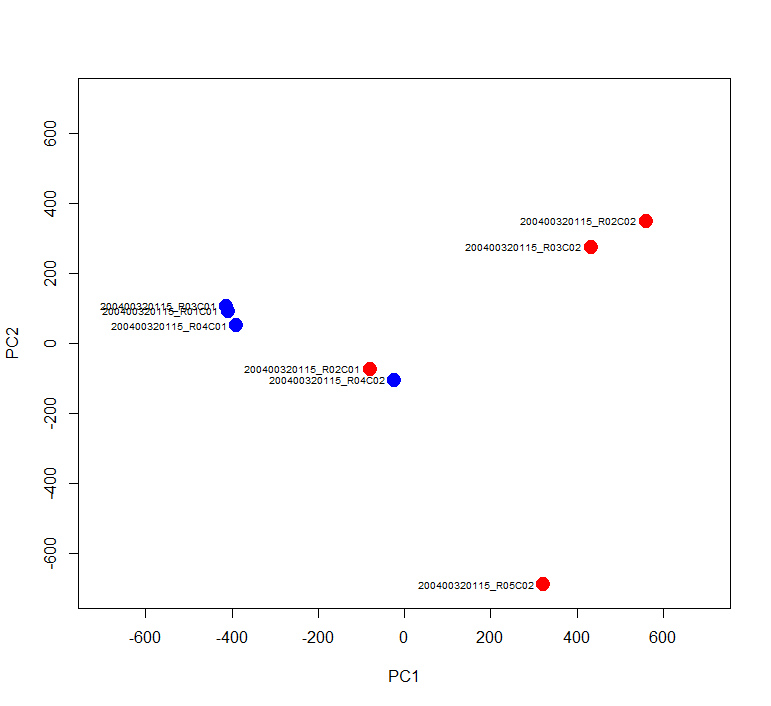

## Step 9. Identifying differentially methylated probes

The differentially methylated probes between the two populations (WT and MUT) are identified by applying a statistical test (t-test, as assigned) to the normalized beta values obtained in step 7.

The t-test is performed via the t.test() function on each row of the normalized beta values matrix. The output is a list with class "htest", containing the computed p-value, among other components.

In [ ]:
# Define a function to apply t.test() on each row
t_test_function <- function(x) {
    t_test <- t.test(x ~ targets$Group)
        return(t_test$p.value)
}

# Compute p-value 
pValues_t <- apply(normalized_beta, 1, t_test_function)
beta_pValues <- data.frame(normalized_beta, pValues_t)

## Step 10. Multiple test correction

Everytime an analysis involves multiple tests, the number of detected false positives (type I errors) increases proportionally to the number of tests if the cutoff for such errors (alpha) is not properly corrected. In other words, the probability of falsely rejecting the null hypothesis increases while performing multiple comparisons, thus for a reliable estimate of the significant results, we need to correct either the error cutoff (to be more stringent) or the tests' p-values (so not reach significance by chance).

To overcome the problem for a given threshold (as 0.05), it is possible to apply correction methods to the tests' raw p-values already computed in step 9.
Two of the most used methods are Bonferroni correction and Benjamini-Hochberg (BH) correction, applied in this analysis with the p.adjust() function.

In [ ]:
# Significant results without correction
raw_pValues <- beta_pValues[beta_pValues$pValues_t<=0.05,]

# Applying Bonferroni
Bonferroni_pValues <- p.adjust(beta_pValues$pValues_t, "Bonferroni")

# Applying BH
BH_pValues <- p.adjust(beta_pValues$pValues_t, "BH")

# Comparison
ttest_final <- data.frame(pValues_t, BH_pValues, Bonferroni_pValues)
dim(raw_pValues)
dim(ttest_final[ttest_final$Bonferroni_pValues<=0.05,])
dim(ttest_final[ttest_final$BH_pValues<=0.05,])

Without correction, for a threshold set at 0.05, 67180 results seem to be significant. 
After the BH correction, with the same threshold, 167 results are significant, and after Bonferroni correction, only 3. 

Below, a boxplot of the t-test results, to appreciate the effect of correction of different methods.
It is evident that the Bonferroni method is the most stringent (applies FWER control) toward false positives, with the drawback of accepting a high rate of false negatives. It is appropriate whenever high confidence in all the genes under analysis is desired. Benjamini & Hochberg correction applies FDR-control, less stringent, thus appropriate if a proportion of false positives is tolerable.

In [ ]:
# Plot t-test final results
par(mfrow=c(1,1))
boxplot(ttest_final, ylim = c(-0.1, 1.1), col = c("red3", "seagreen3", "seashell2"))
legend("topright", inset=c(-0.7,0), legend=c("raw", "BH", "Bonferroni"),
       col=c("red3", "seagreen3", "seashell2"), lty=1:1, cex=0.9, xpd=TRUE)

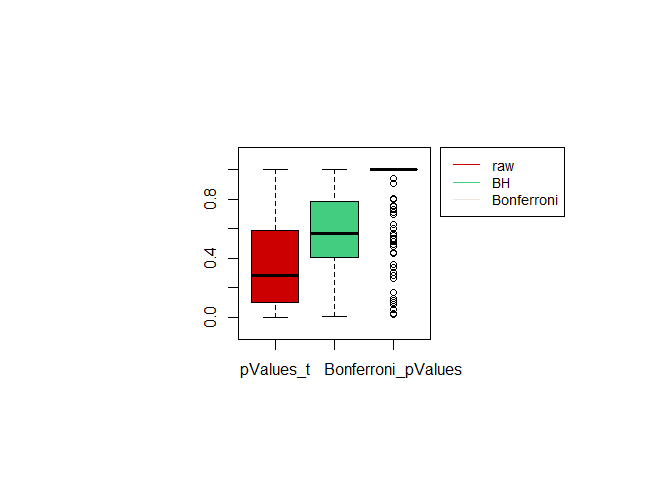

## Step 11. Volcano plot and Manhattan plot

A volcano plot is a type of scatterplot that shows statistical significance (P value) versus magnitude of change (fold change).
It is produced from the beta-values p-values and the difference between the mean of the normalized beta values of the two populations (WT and MUT).

In [ ]:
# WT group mean
WT_group <- beta_pValues[,targets$Group=="WT"]
WT_group_mean <- apply(WT_group, 1, mean)

# MUT group mean
MUT_group <- beta_pValues[,targets$Group=="MUT"]
MUT_group_mean <- apply(MUT_group, 1, mean)

# Compute delta
delta <- WT_group_mean - MUT_group_mean

# t-test p-values dataframe and highlight delta > 0.1
VolcPlot <- data.frame(delta, -log10(ttest_final$pValues_t))
Highlight <- VolcPlot[abs(VolcPlot[, 1])>0.1 & VolcPlot[, 2]>(-log10(0.05)),]

# Volcano plot
plot(VolcPlot[,1], VolcPlot[,2], pch=16, cex=0.3, ylab="p-Value (-log)", xlab="Delta",ylim = c(0, 8)) -log10(0.05)
abline(a=-log10(0.05),b=0,col="yellow")
points(Highlight[,1], Highlight[,2],pch=16,cex=0.4,col="cyan")

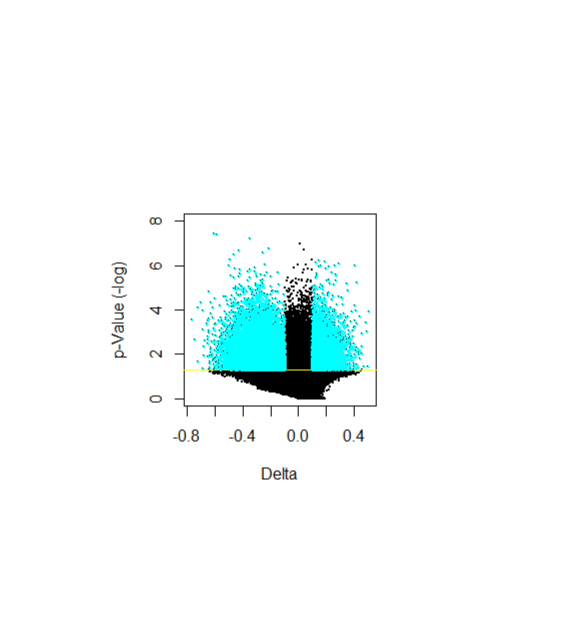

A Manhattan plot plots the association statistical significance as –log10(p-value) in the y-axis, against chromosomes in the x-axis.

To produce it, it is first necessary to associate each CpG probe with its genomic position, with reference to the Illumina Manifest.
After that, an input object containing informations about probe, chromosome, genomic position and p-value is created and provided in input to the manhattan() function.

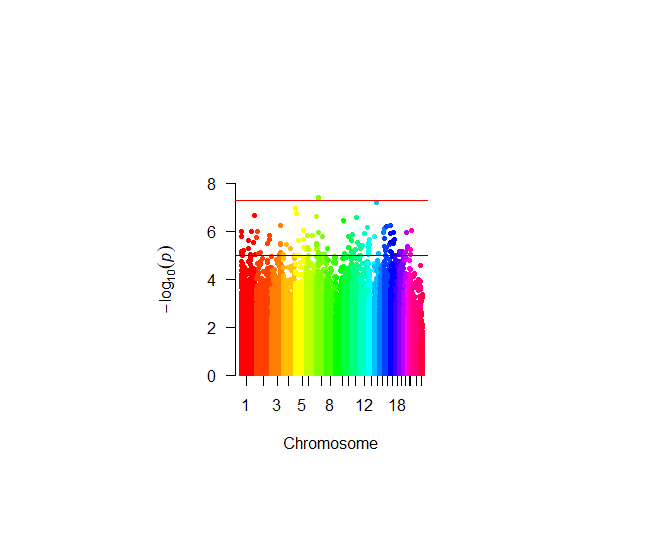

## Step 12. Heatmap

Heatmaps are graphical representation of data, where the individual values in matrix are represented as colors. The variation in color (either by hue or intensity) is related to the magnitude of the specific value.  
Combined with hierarchical clustering methods, it makes evident possible patterns of similarity or diversity in the dataset.

The procedure of hierarchical clustering involves an iterated process where distances between samples are evaluated as a distance matrix, such matrix is searched according to a choosen linkage method, a cluster is produced and the process repeats.
As linkage method, it can be applied complete linkage, that involves joining clusters whose distance between further genes is the smallest; there is otherwise the single linkage, to join clusters whose distances between the closest genes is the smallest; finally, the average linkage, joining clusters whose average distance is the smallest.

Three heatmaps have been produced, according to each linkage method presented. Genes exhibiting a similar methylation profile exhibits a similar color intensity in the maps. Below, it can be appreciated that entire clusters change from a methylated state (darker shade of red) in the wild-type (blue) to an unmethylated state (bright green) in the mutated (orange).
Moreover, it noticeable that the methylation patterns are quite consistent across the different linkage methods.

In [ ]:
# Load gplots
library(gplots)

# Create input matrix of the top 100 differentially mehtylated probes
beta_pValues_ordered <- beta_pValues[order(beta_pValues$pValues_t),]
input_heatmap=as.matrix(beta_pValues_ordered[1:100,1:8])

# Vector color-mapping to WT arrays and MUT arrays according to group membership
colorbar <- c("blue","orange","blue","blue","orange","orange","blue","orange")

# Palette of colors
palette <- colorRampPalette(c("green","black","red"))(100)

# Complete linkage
heatmap.2(input_heatmap,col=palette,Rowv=T,Colv=T,dendrogram="both",key=T,ColSideColors=colorbar,density.info="none",trace="none",scale="none",symm=F,main="Complete linkage")

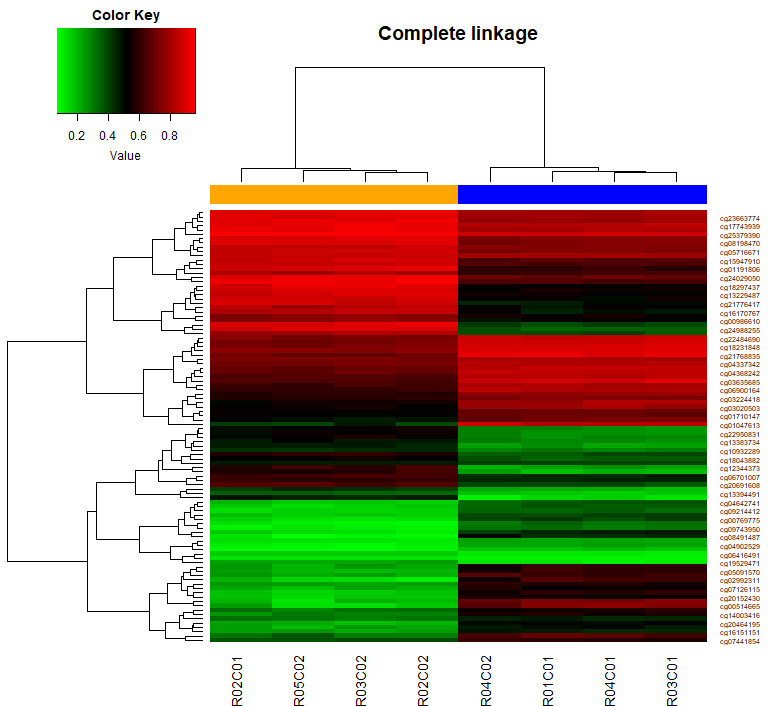

In [ ]:
# Single linkage
heatmap.2(input_heatmap,col=palette,Rowv=T,Colv=T,hclustfun = function(x) hclust(x,method = 'single'),dendrogram="both",key=T,ColSideColors=colorbar,density.info="none",trace="none",scale="none",symm=F,main="Single linkage")

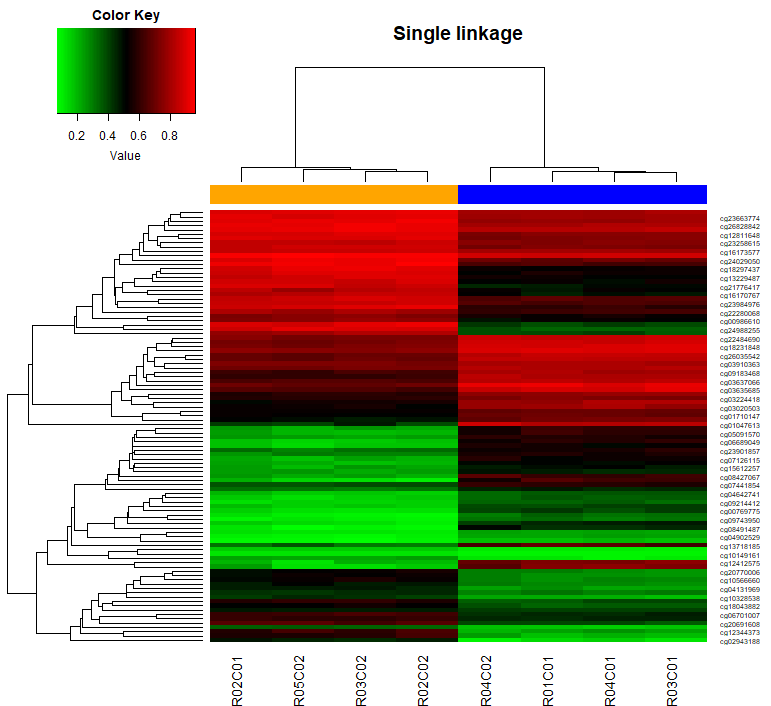

In [ ]:
# Average linkage
heatmap.2(heatmap,col=palette,Rowv=T,Colv=T,hclustfun = function(x) hclust(x,method = 'average'),dendrogram="both",key=T,ColSideColors=colorbar,density.info="none",trace="none",scale="none",symm=F,main="Average linkage")

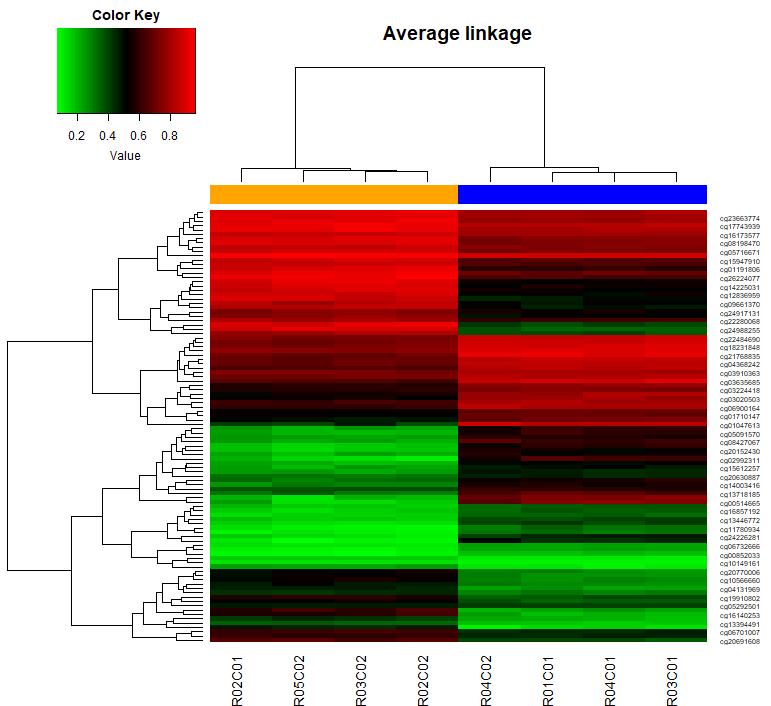